In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
sns.set_style('darkgrid')

In [15]:
train = pd.read_csv('../input/train.csv')

In [16]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [40]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [37]:
train.dtypes['MSSubClass']

dtype('int64')

In [38]:
train.dtypes['LotFrontage']

dtype('float64')

In [39]:
train.dtypes['Street']

dtype('O')

<AxesSubplot:xlabel='SalePrice'>

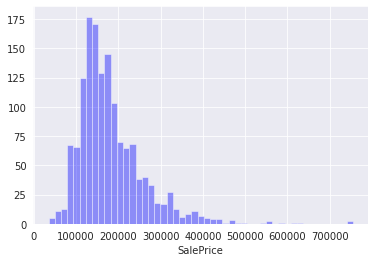

In [17]:
sns.distplot(train.SalePrice, kde=False, color="b")

In [ ]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [18]:
missing = train.isnull().sum()

In [22]:
type(missing)

pandas.core.series.Series

In [21]:
type(train)

pandas.core.frame.DataFrame

In [23]:
missing

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [26]:
train.isnull().sum(axis=1)

0       5
1       4
2       4
3       4
4       4
       ..
1455    4
1456    3
1457    2
1458    5
1459    5
Length: 1460, dtype: int64

In [27]:
missing = missing[missing > 0]

In [28]:
missing

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [31]:
missing = missing.sort_values()

In [32]:
missing

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageYrBlt       81
GarageType        81
GarageQual        81
GarageCond        81
GarageFinish      81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

<AxesSubplot:>

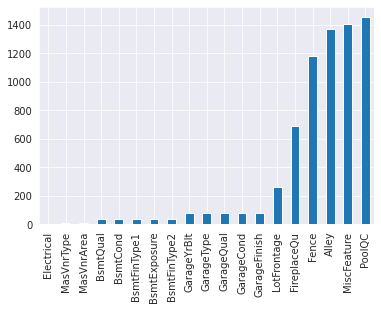

In [35]:
missing.plot.bar()

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice'>

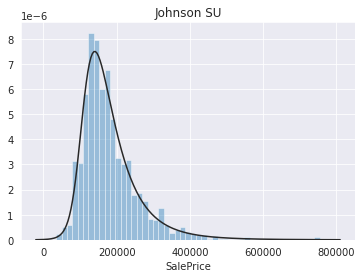

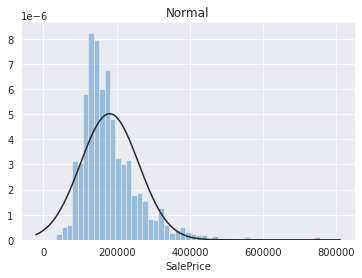

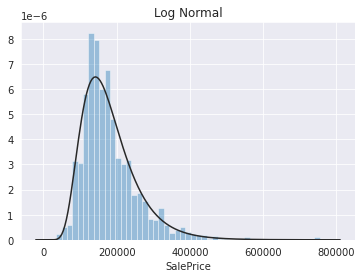

In [36]:
import scipy.stats as st
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [42]:
len(quantitative)

36

In [43]:
f = pd.melt(train, value_vars=quantitative)

In [44]:
f

,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0
...,...,...
52555,YrSold,2007.0
52556,YrSold,2010.0
52557,YrSold,2010.0
52558,YrSold,2010.0


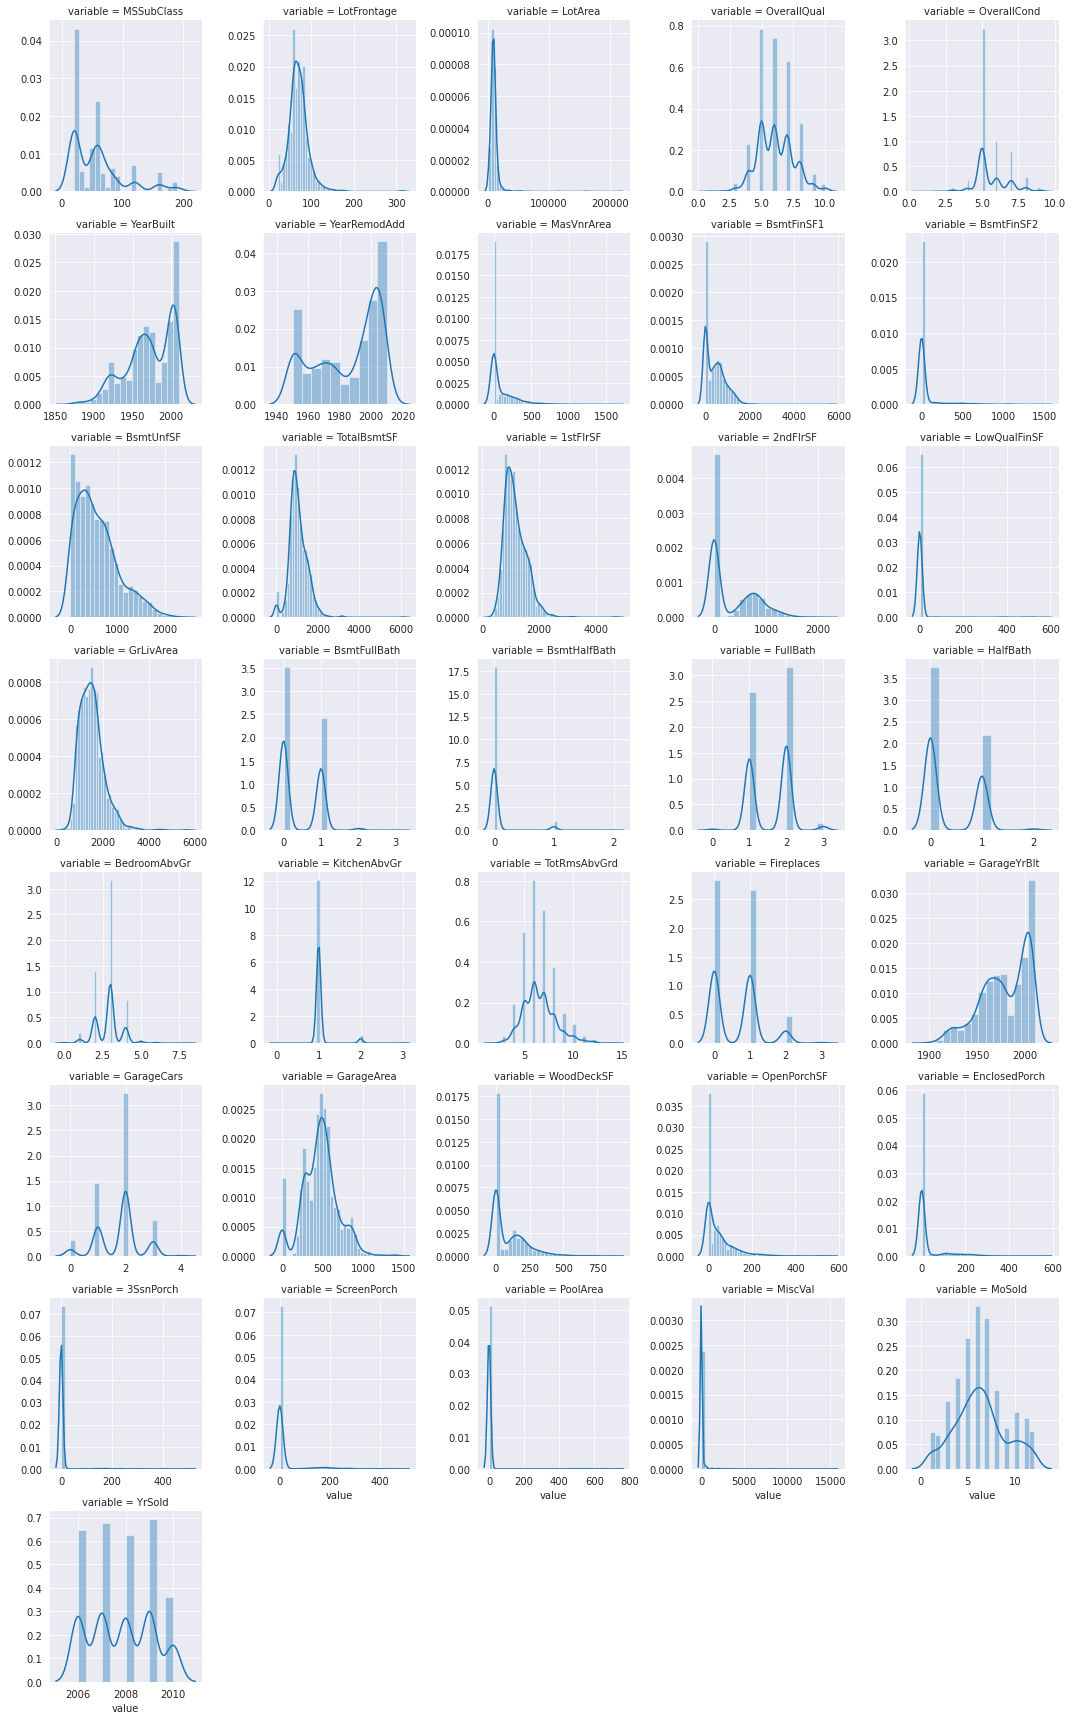

In [45]:
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

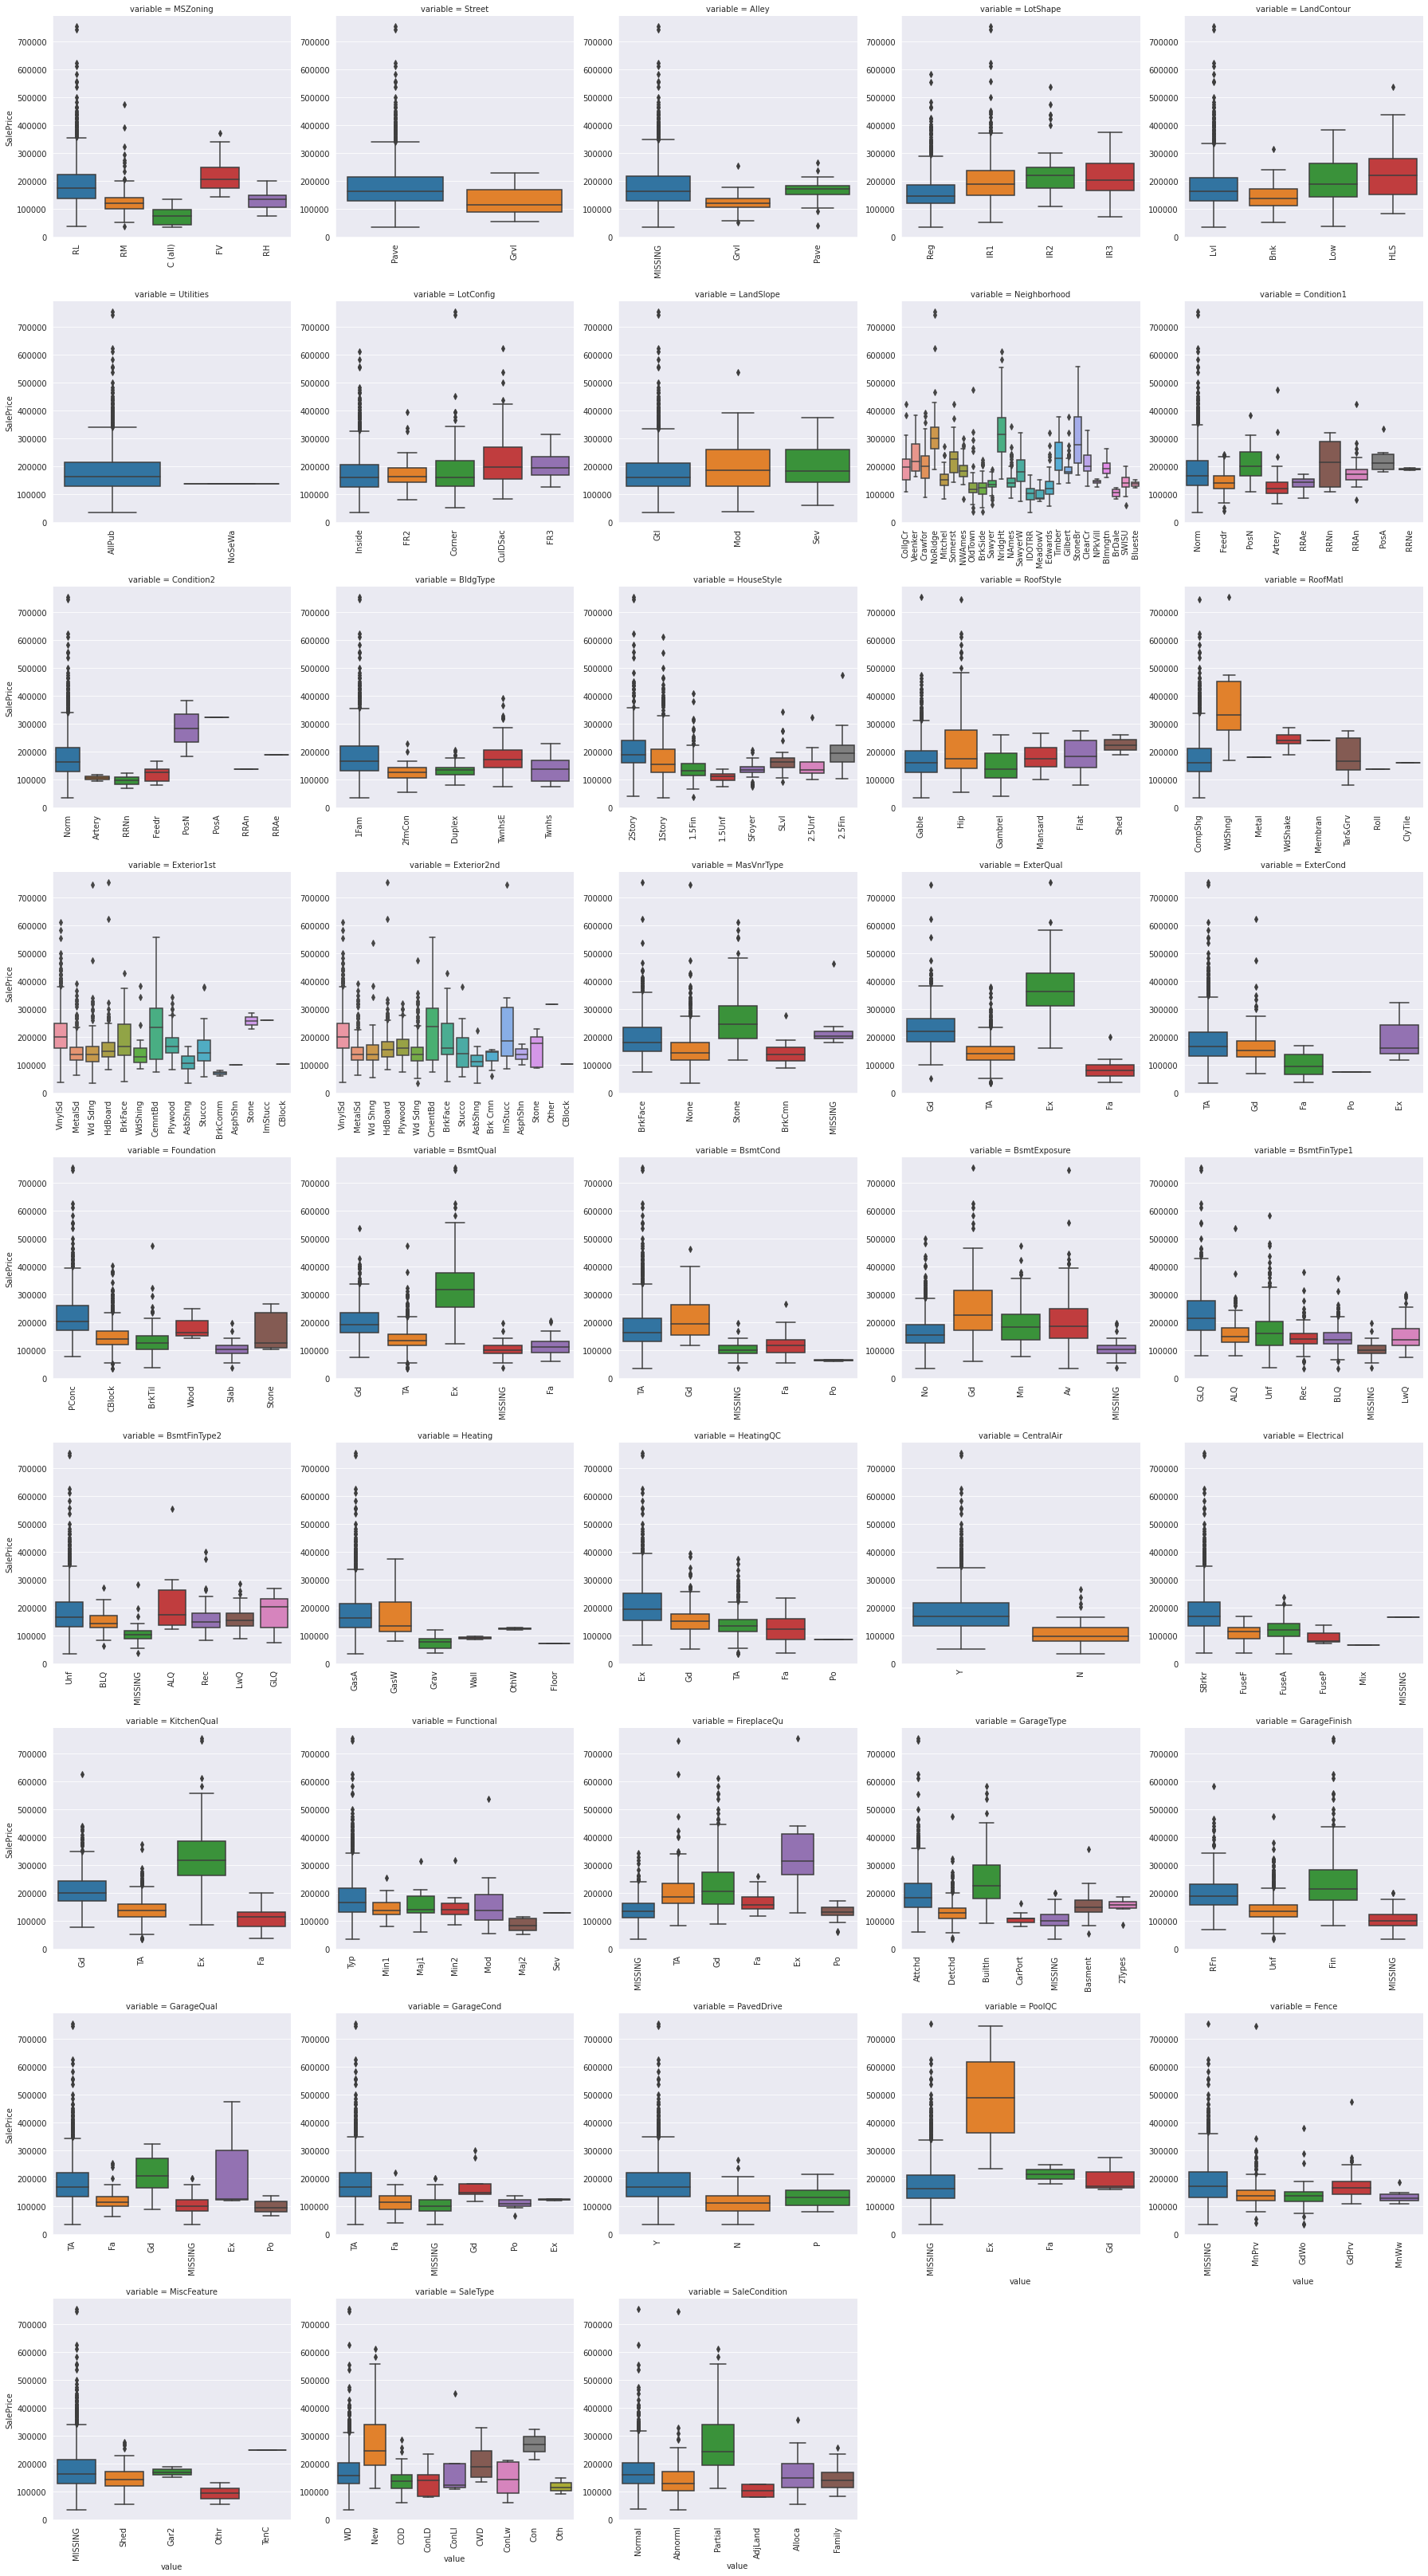

In [48]:
for c in qualitative:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

In [49]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [50]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E
0,1,60,RL,65.0,8450,Pave,MISSING,Reg,Lvl,AllPub,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0
1,2,20,RL,80.0,9600,Pave,MISSING,Reg,Lvl,AllPub,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0
2,3,60,RL,68.0,11250,Pave,MISSING,IR1,Lvl,AllPub,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0
3,4,70,RL,60.0,9550,Pave,MISSING,IR1,Lvl,AllPub,...,3.0,2.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,2.0
4,5,60,RL,84.0,14260,Pave,MISSING,IR1,Lvl,AllPub,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,MISSING,Reg,Lvl,AllPub,...,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0
1456,1457,20,RL,85.0,13175,Pave,MISSING,Reg,Lvl,AllPub,...,6.0,2.0,4.0,6.0,3.0,1.0,3.0,4.0,5.0,5.0
1457,1458,70,RL,66.0,9042,Pave,MISSING,Reg,Lvl,AllPub,...,6.0,3.0,4.0,6.0,3.0,1.0,4.0,2.0,5.0,5.0
1458,1459,20,RL,68.0,9717,Pave,MISSING,Reg,Lvl,AllPub,...,6.0,2.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0


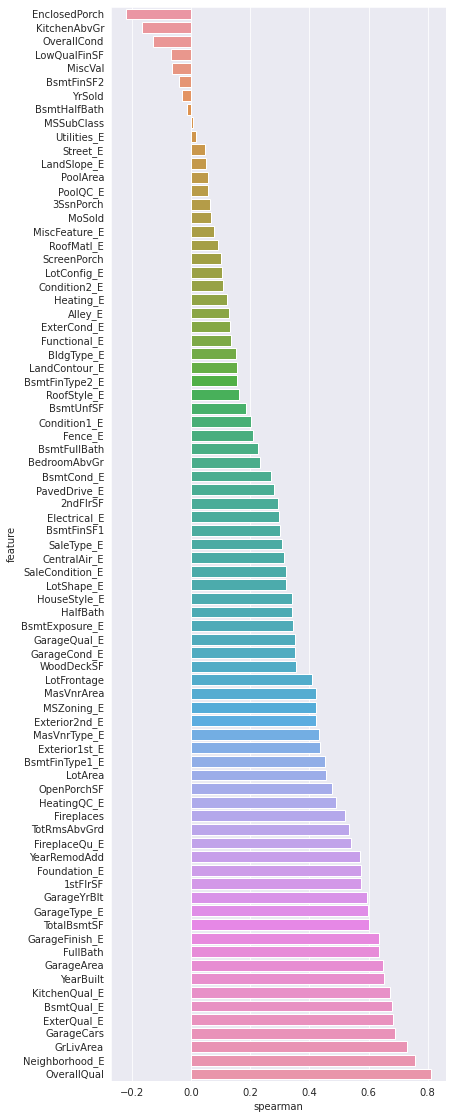

In [51]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

<AxesSubplot:>

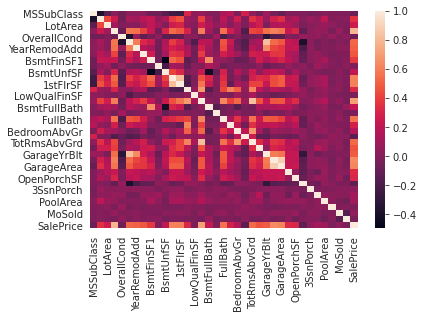

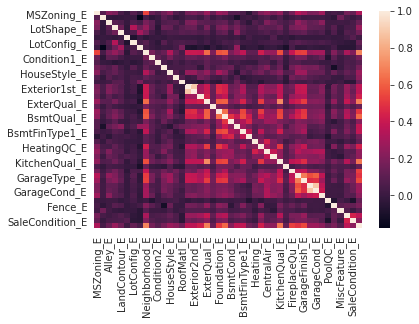

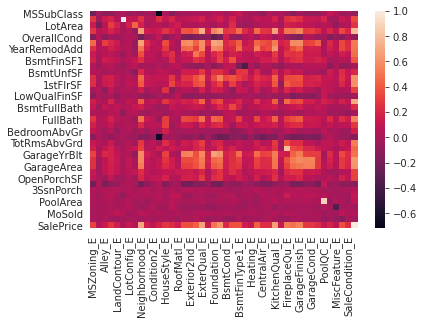

In [52]:
plt.figure(1)
corr = train[quantitative+['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = train[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.heatmap(corr)

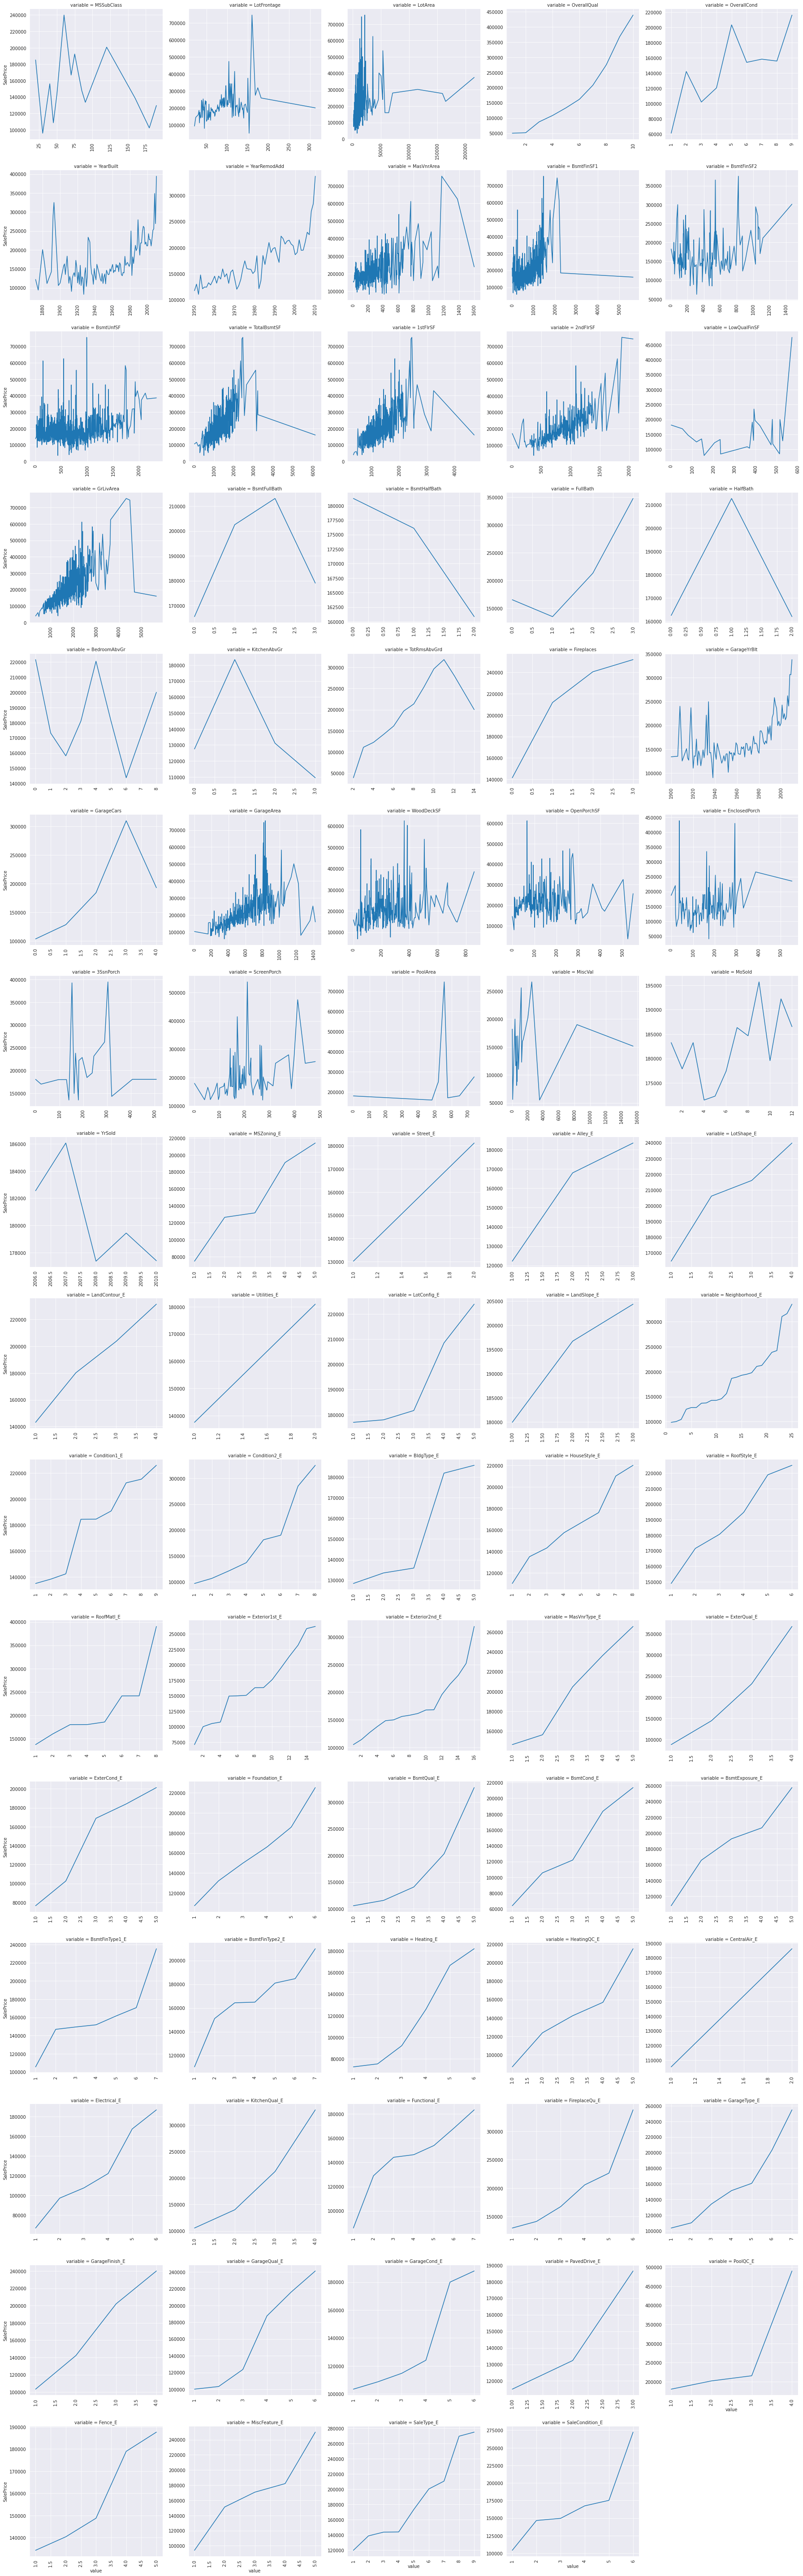

In [55]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False, height=5)
g = g.map(pairplot, "value", "SalePrice")

0.7498641494963064


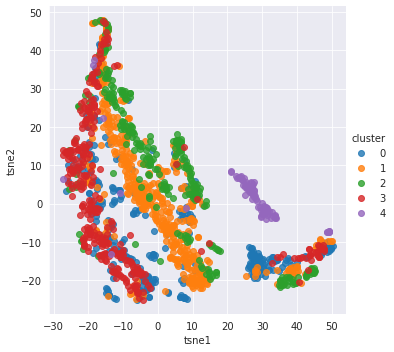

In [53]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = quantitative + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = train[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

In [131]:
from sklearn.linear_model import LassoLarsCV, RidgeCV, Ridge, LassoLars, Lasso

<AxesSubplot:>

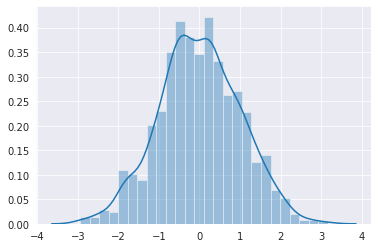

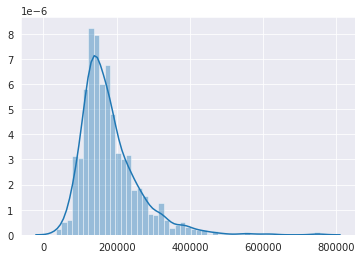

In [57]:
y = train['SalePrice'].values
def johnson(y):
    gamma, eta, epsilon, lbda = st.johnsonsu.fit(y)
    yt = gamma + eta*np.arcsinh((y-epsilon)/lbda)
    return yt, gamma, eta, epsilon, lbda

def johnson_inverse(y, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((y-gamma)/eta) + epsilon

yt, g, et, ep, l = johnson(y)
yt2 = johnson_inverse(yt, g, et, ep, l)
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.distplot(yt2)

## 特徴量作成

In [59]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def log_transform(df, feature):
    df[feature] = np.log1p(df[feature].values)

def quadratic(df, feature):
    df[feature+'2'] = df[feature]**2

log_features = [
    'GrLivArea',
    '1stFlrSF',
    '2ndFlrSF',
    'TotalBsmtSF',
    'LotArea',
    'LotFrontage',
    'KitchenAbvGr',
    'GarageArea'
]

for f in log_features:
    log_transform(train, f)

quad_feats = [
    'OverallQual',
    'YearBuilt',
    'YearRemodAdd',
    'TotalBsmtSF',
    '2ndFlrSF',
    'Neighborhood_E',
    'RoofMatl_E',
    'GrLivArea'
]

qdr = [f+'2' for f in quad_feats]

for f in quad_feats:
    quadratic(train, f)

train['HasBasement'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasGarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['Has2ndFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasMasVnr'] = train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
train['HasWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['IsNew'] = train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasMasVnr', 'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew']

features = quantitative + qual_encoded + boolean + qdr

## 学習

In [65]:
lasso = LassoLarsCV(max_iter=10000)
X = train[features].fillna(0.).values
Y = train['SalePrice'].values
lasso.fit(X, np.log(Y))

Ypred = np.exp(lasso.predict(X))
error(Y, Ypred)

0.11194749395516394

<AxesSubplot:>

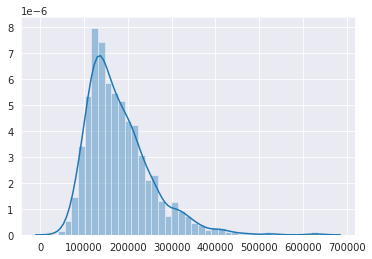

In [66]:
sns.distplot(Ypred)

In [61]:
lasso = LassoLarsCV(max_iter=10000)
X = train[features].fillna(0.).values
Y = train['SalePrice'].values
lasso.fit(X, Y)

Ypred = lasso.predict(X)
error(Y, Ypred)

0.13844689623739942

<AxesSubplot:>

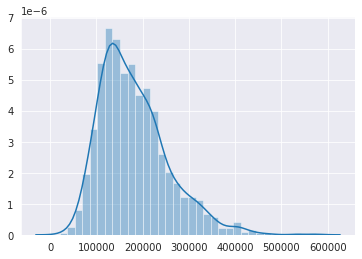

In [63]:
sns.distplot(Ypred)

In [67]:
lasso = LassoLarsCV(max_iter=10000)
X = train[features].fillna(0.).values
Y = train['SalePrice'].values

yt, g, et, ep, l = johnson(Y)
lasso.fit(X, yt)

Ypred = johnson_inverse(lasso.predict(X), g, et, ep, l)
error(Y, Ypred)

0.11231608668957864

In [69]:
ridge = RidgeCV()
X = train[features].fillna(0.).values
Y = train['SalePrice'].values
ridge.fit(X, np.log(Y))

Ypred = np.exp(ridge.predict(X))
error(Y, Ypred)

0.12073644927188748

## Cross validation

In [70]:
from sklearn.model_selection import KFold

In [87]:
kf = KFold(n_splits=5, shuffle=True, random_state=216)

In [132]:
X = train[features].fillna(0.).values
Y = train['SalePrice'].values

models = []
Ypred = np.zeros_like(Y)

for train_index, val_index in kf.split(X):
    X_tr = X[train_index]
    X_val = X[val_index]
    y_tr = Y[train_index]
    y_val = Y[val_index]
    
    lasso = Lasso()
    lasso.fit(X_tr, np.log(y_tr))
    
    y_pred = np.exp(lasso.predict(X_val))
    Ypred[val_index] = y_pred
    
    print(error(y_val, y_pred))
    
    models.append(lasso)

0.18030147553482176
0.23085784667272152
0.17946245180357964
0.20382685353136584
0.1964594958720273


In [133]:
error(Y, Ypred)

0.19907400513277945

In [134]:
Ypred = np.vstack([np.exp(m.predict(X)) for m in models]).mean(axis=0)
error(Y, Ypred)

0.1939478849824793

In [135]:
X = train[features].fillna(0.).values
Y = train['SalePrice'].values

models = []
Ypred = np.zeros_like(Y)

for train_index, val_index in kf.split(X):
    X_tr = X[train_index]
    X_val = X[val_index]
    y_tr = Y[train_index]
    y_val = Y[val_index]
    
    ridge = Ridge(max_iter=10000)
    ridge.fit(X_tr, np.log(y_tr))
    
    y_pred = np.exp(ridge.predict(X_val))
    Ypred[val_index] = y_pred
    
    print(error(y_val, y_pred))
    
    models.append(ridge)

0.11639278083556867
0.15438475804845572
0.11654856003725297
0.1345354635921286
0.11823479519272044


In [136]:
error(Y, Ypred)

0.12887571264270536

In [137]:
Ypred = np.vstack([np.exp(m.predict(X)) for m in models]).mean(axis=0)

In [116]:
error(Y, Ypred)

0.11328397501710437